In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import panel as pn
from scipy import stats 
pn.extension('katex') 

import warnings
warnings.filterwarnings("ignore")

# Reactive transport #


<br>

1. **Solution of Homework Problems 10 - 11**
<br>

2. **Tutorial Problems on Reactive Transport**
<br>

3. **Homework Problems on Reactive Transport**

<br>







## Homework Problem 10: Aquifer characterization  ##

A pumping test is conducted to determine hydraulic properties (storage coefficient $S$, the transmissivity $T$ and the hydraulic conductivity $K$) of 
the aquifer. of a confined aquifer. For this purpose, a constant 
pumping rate of 1219 m<sup>3</sup>/d is established and drawdown is recorded in an observation well. This problem is to be 
solved with the Theis method implemented in the code below.

The code generates the typ curve based on your date of birth (ddmmyyyy). To use the code, you will provide different value of $T$ and $S$ and make a match of the data with the typ-curve.

Code (2 cells below)

### Solution Homework Problem 10 ###

In [2]:
# Functions to generate well-function (this is another method based on scipy library)

from scipy.special import expi
def W(u): 
    return -expi(-u)

#Generate your data and function required to solve

def data(Q, DOB, S, T):

    '''
    Q = pumping rate in m^3/s, 
    DOB- date of birth (ddmmyyyy), 
    S = Storage Coeff. and 
    T = Transmissivity (m^2/s)
    '''
    S_dob = sum(int(DOB) for DOB in str(DOB)) # add numbers in your DOB
    d_t = np.array([3.5, 5, 6.2, 8, 9.2, 12.4, 16.5, 20, 30, 60, 100, 200, 320, 380, 500])
    d_d = np.array([0.12, 0.23, 0.31, 0.41, 0.47, 0.64, 0.82, 0.92, 1.2, 1.74, 2.14, 2.57, 3, 3.1, 3.34])
    data_t = d_t/(S_dob/22)**3 # min, time based on DOB
    data_d = d_d/(S_dob/22) # m, drawdown data based on DOB
    dist = 251/(S_dob/22) # m, distance to observation well based on DOB
    Aq_t = 15/(S_dob/22) # m, aquifer thickness based on DOB
    
    i_u = (4*T*data_t*60)/(S*dist**2) 
    W_u = (4*np.pi*data_d*T)/(Q)
    return i_u, W_u

Row
    [0] DataFrame(DataFrame)
    [1] Matplotlib(Figure, dpi=150, height=450, width=675)
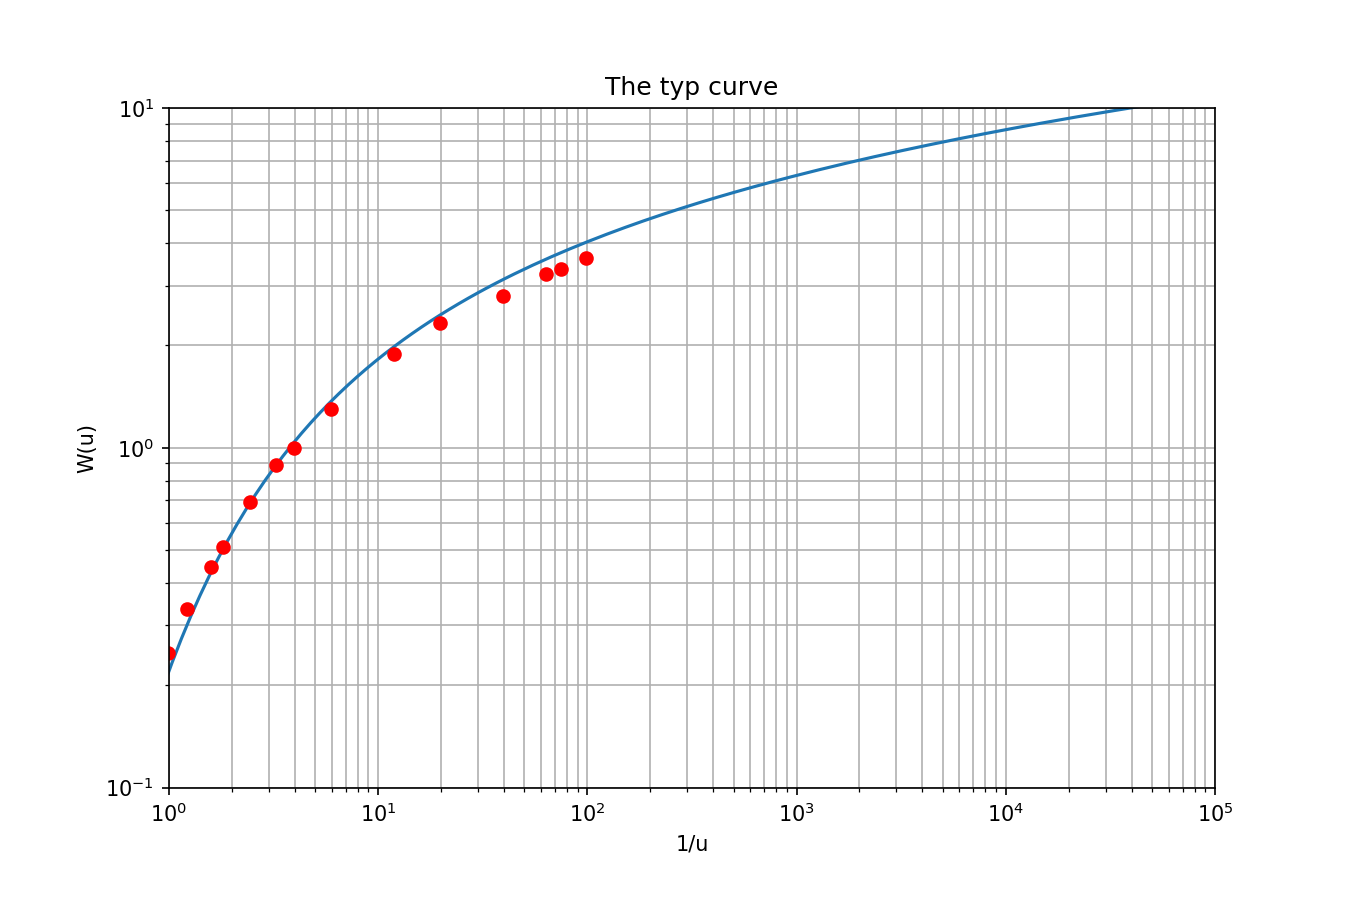

In [3]:
#Solution 
#Q = pumping rate in m^3/s, DOB- date of birth (ddmmyyyy), S = Storage Coeff. and T = Transmissivity (m^2/s)
# Change the value in the bracket to find the fit

i_u, W_u = data(Q=2.41E-02, DOB=17071975, S=4.0e-05, T = 3.5e-03)

#interim calculation to get typ-curve
u_1 = np.logspace(10,-1,250, base=10.0) # setting the value of u
w_u =W(1/u_1) # finding W(1/u) : as we use 1/u in the typ curce

# Output
dx_1 = {"1/u":i_u, "W(u)":W_u}; dfx_a = pd.DataFrame(dx_1); figs = plt.figure(figsize=(9,6)) 
plt.loglog(u_1, w_u) # typ curve
plt.loglog(i_u, W_u, "ro" ) # your data
plt.title("The typ curve"); plt.ylim((0.1, 10)); plt.xlim(1, 1e5)
plt.grid(True, which="both",ls="-"); plt.ylabel(r"W(u)");plt.xlabel(r"1/u"); plt.close()
rx_2 = pn.pane.Matplotlib(figs, dpi=150); pn.Row(dfx_a, rx_2) 

### Homework Problem 11 - Conservative transport ### 

In [4]:
rh11_1 = pn.pane.Markdown("""
NaCl is used to conduct a conservative tracer test in a Darcy column (length: 85 cm, diameter: 7.5 cm). 
The volumetric flow rate is 10 mL/min and the NaCl is continuously injected (concentration: 55 mg/L). 
The table shows NaCl concentrations measured at the column outlet at different times.

""",width = 600, style={'font-size': '12pt'})

rh11_2 = pn.pane.LaTeX(r"""
a) Normalise outlet concentration with injection concentration.<br>
b) Plot normalized concentration as a function of time.<br>
c) Determine graphically $t_{16}$, $t_{50}$, and $t_{84}$, where $t_x$ denotes the time when $x$% of the 
injection concentration is reached at the column outlet.<br>
d) Determine effective porosity via $ n_e = \frac{Q\cdot t_{50}}{V}$ <br>                                                                     
with $V$ = total volume of the column.<br>
e) Determine dispersivity via $\alpha = \frac{L}{8}\cdot \bigg(\frac{t_{84}-t_{16}}{t_{50}}\bigg)$

""",width = 600, style={'font-size': '12pt'})


dh11_t = np.array([15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
dh11_C =  np.array([0, 0, 0, 2.5, 5.4, 10.6, 21.0, 29.1, 40.8, 51.7, 55.0, 55.0])

dh11 = {"Time [min]":dh11_t, "Conc. [mg/L]":dh11_C}

dfh11 = pd.DataFrame(dh11)

spacer = pn.Spacer(width=50)

rh11_3= pn.Column(rh11_1, rh11_2 )
pn.Row(rh11_3, spacer, dfh11)

Row
    [0] Column
        [0] Markdown(str, style={'font-size': '12pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '12pt'}, width=600)
    [1] Spacer(width=50)
    [2] DataFrame(DataFrame)

### Solution Homework Problem 11 ### 

In [5]:
# solution 11. a

C_m = 55 # mg/L, injected concentration

# calculation
dh11_rc = dh11_C/C_m # (-), Relative conc. Conc Out/Injected Con 

#output
dh11_a = dh11 = {"Time [min]":dh11_t, "Conc. [mg/L]":dh11_C, "Rel. Conc [-]":dh11_rc}
df11_a = pd.DataFrame(dh11_a)
df11_a 

,Time [min],Conc. [mg/L],Rel. Conc [-]
0,15,0.0,0.000000
1,30,0.0,0.000000
2,45,0.0,0.000000
3,60,2.5,0.045455
4,75,5.4,0.098182
5,90,10.6,0.192727
6,105,21.0,0.381818
7,120,29.1,0.529091
8,135,40.8,0.741818
9,150,51.7,0.940000


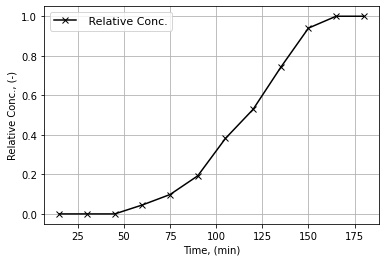

In [6]:
# Solution 11 b

# Plotting
fig = plt.figure()
plt.plot(dh11_t, dh11_rc, 'x-', color = "k", label=' Relative Conc.');
plt.xlabel(r"Time, (min)"); plt.ylabel(r"Relative Conc., (-)");
plt.grid(); plt.legend(fontsize=11); 


Row
    [0] Column
        [0] LaTeX(str, style={'font-size': '13pt'}, width=300)
    [1] Matplotlib(Figure, dpi=150, height=300, width=450)
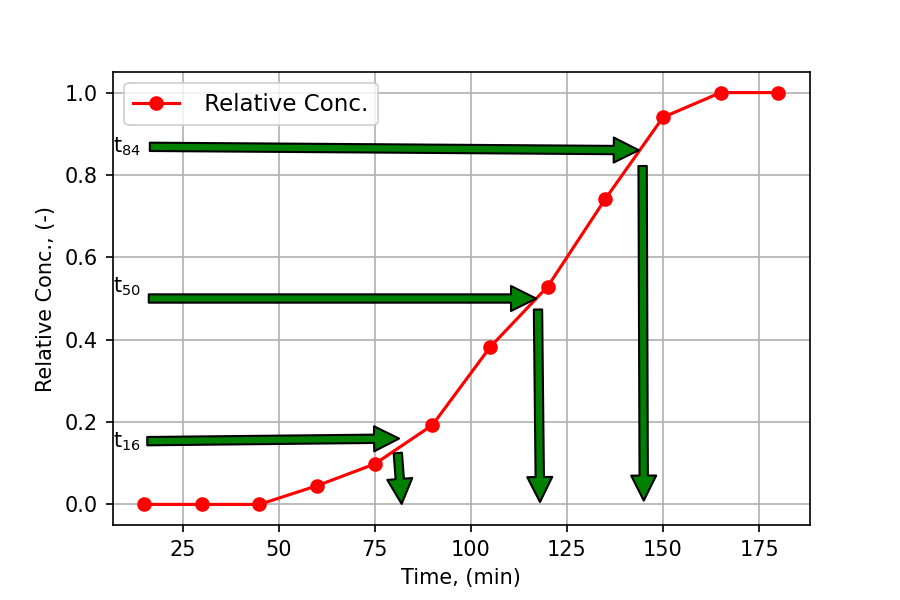

In [7]:
#Solution HW 11 c

fig = plt.figure()
plt.plot(dh11_t, dh11_rc, 'o-', color = "r", label=' Relative Conc.');
plt.xlabel(r"Time, (min)"); plt.ylabel(r"Relative Conc., (-)");
plt.grid(); plt.legend(fontsize=11); 
plt.annotate(r't$_{16}$', xy=(82, 0.16),  xycoords='data',xytext=(0.0001, 0.16), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(82, 0.0),  xycoords='data',xytext=(0.409, 0.16), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate(r't$_{50}$', xy=(118, 0.5),  xycoords='data',xytext=(0.0001, 0.5), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(118, 0.001),  xycoords='data',xytext=(0.61, 0.48), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate(r't$_{84}$', xy=(145, 0.86),  xycoords='data',xytext=(0.0001, 0.81), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(145, 0.001),  xycoords='data',xytext=(0.76, 0.80), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.close() # otherwise we have 2 figure
r6_8 = pn.pane.Matplotlib(fig, dpi=150)

r6_9 = pn.pane.LaTeX(r""" 
From the figure:<br>
$t_{16}\approx 80$<br>
$t_{50}\approx 120$<br>
$t_{84}\approx 145$<br>
                     
""",width = 300, style={'font-size': '13pt'})

r6_10 = pn.Column(r6_9)

pn.Row(r6_10, r6_8) 

In [8]:
#Solution HW-11 d 

#Given
Q = 10 # mL/min, discharge in column
dc = 7.5 # cm, diameter of column
Lc = 85 # cm, length of column
t_50 = 120 # min, obtained from 17c

# Calculation
Vc = np.pi*(dc/2)**2*Lc # cm^3, Volume of column pi*d^2/4* h-
n_ef = Q*t_50/Vc # (-), effective porosity from given formula

#output
print("The effective porosity in the column is {0:1.2f}".format(n_ef))


The effective porosity in the column is 0.32


In [9]:
#Solution HW 11 e

#Given
t_16 = 80 # min, obtained from 17c
t_84 = 145 # min, obtained from 17c
Lc = 85 # cm, length of column

# Calculation
alpha = Lc/8*((t_84-t_16)/t_50)**2 

#output
print("The required dispersivity in the column is {0:1.2f}".format(alpha), "m")

The required dispersivity in the column is 3.12 m


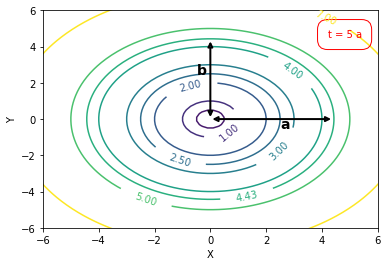

In [10]:
# contour plot code

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(np.square(X) + np.square(Y))

levels = [0.0, 0.5, 1.0, 2.0, 2.5, 3.0, 4.0, 4.43, 5, 7.0]
cp = plt.contour(X, Y, Z, levels)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X');plt.ylabel('Y')
plt.xlim([-6, 6]); plt.ylim([-6, 6]); 
plt.annotate("",xy=(0.0, 0.0), xycoords='data', xytext=(0.0, 4.4), textcoords='data',
arrowprops=dict(arrowstyle="<|-|>",lw=2,  connectionstyle="arc3"))
plt.annotate("",xy=(0.0, 0.0), xycoords='data', xytext=(4.4, 0), textcoords='data',
arrowprops=dict(arrowstyle="<|-|>", lw=2, connectionstyle="arc3"),)
plt.text(-0.5, 2.5, "b", fontweight="bold", fontsize= 14); plt.text(2.5, -0.5, "a", fontweight="bold", fontsize= 14); 
plt.text(4.2, 4.5, 't = 5 a', color='red', bbox=dict(facecolor='none', edgecolor='red', boxstyle='round,pad=1'))

plt.savefig("images/T09_TP22.png")

### Tutorial Problem 22 - Conservative transport (additional problem) ###

Row
    [0] Column
        [0] LaTeX(str, style={'font-size': '12pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '12pt'}, width=600)
    [1] PNG(str, width=150)
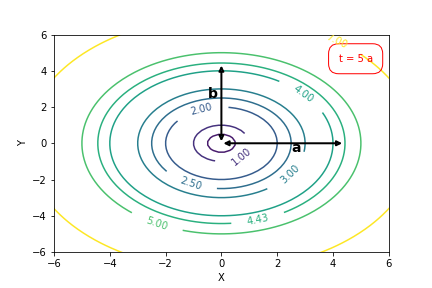

In [11]:
#Problem 22

r22_1 = pn.pane.LaTeX(r"""
A conservative tracer experiment was performed under following conditions:<br>

i) steady uniform flow in an aquifer with thickness $m = 10$ m and effective porosity $n_e = 0.2$<br>
ii) linear velocity: $v_x = 2\cdot 10^{-5}$ m/s, $v_y = 0$<br>
iii) dispersivities $\alpha_L = 0.5$ m, $\alpha_T = 0.2$ m<br>
iv) At $t = 0$, a tracer mass of $M = 985$ kg was injected at $(x_0, y_0) = (0, 250)$ m.<br>
v) The tracer is not subject to sorption or degradation, i.e., $R = 1$, $\lambda = 0$.
""",width = 600, style={'font-size': '12pt'})

r22_2 = pn.pane.LaTeX(r"""
<strong>Questions:</strong> <br>
a) Where is the centre of the tracer mass after a period of $t = 5$ a?
<br>
b) Where is the concentration isoline $C^\ast = 4.43$ mg/L at that time?
(Hint: Follow instructions given on next page to solve a) and b)).
.
""",width = 600, style={'font-size': '12pt'})

r22_3 = pn.pane.PNG("images/T09_TP22.png", width=150)

r22_4 = pn.Column(r22_1, r22_2)
pn.Row(r22_4, r22_3)

Column
    [0] PNG(str, width=600)
    [1] LaTeX(str, style={'font-size': '12pt'}, width=800)
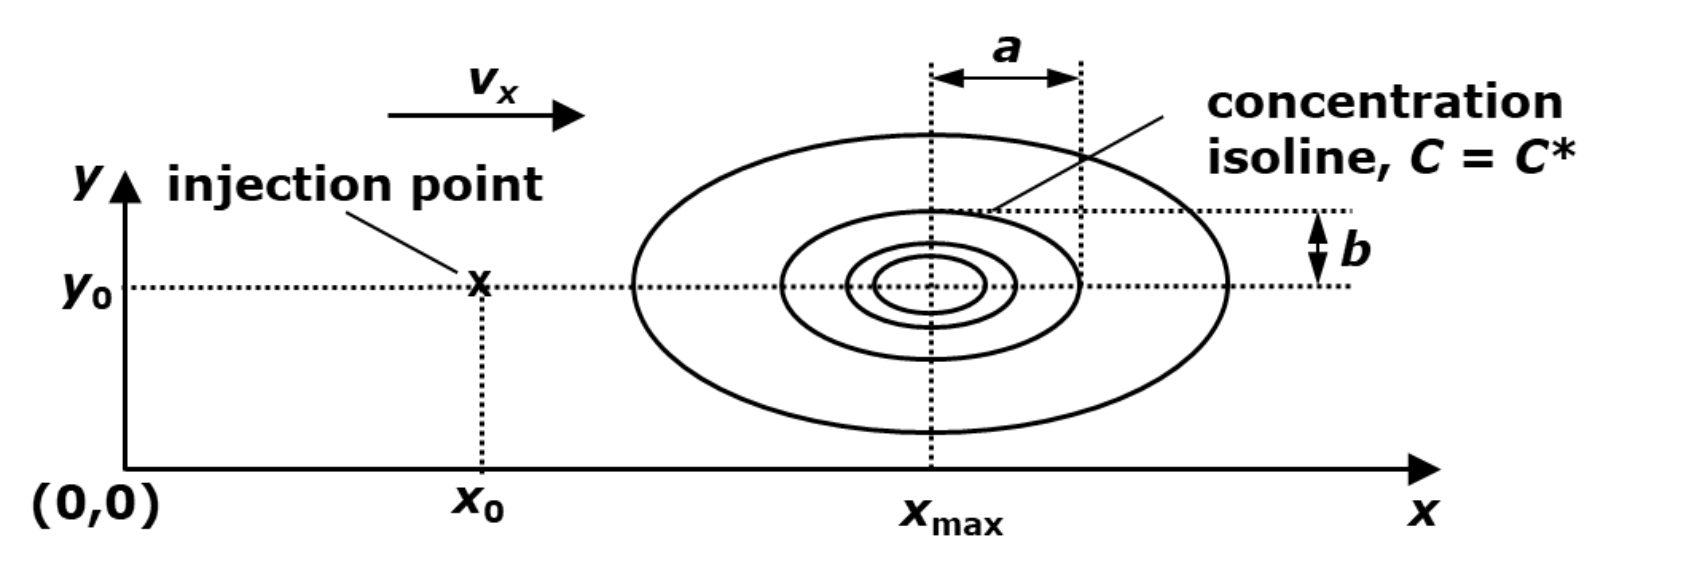

In [12]:
# Solution of Problem 26
r22_7 = pn.pane.PNG("images/T09_TP22a.png", width=600)

r22_8 = pn.pane.LaTeX(r""" 
<br>
Concentration isolines are elliptic in the given scenario. 
Four steps are to be performed to answer problems a) and b):<br>
<br>
<strong>Step 1:</strong> Find centre of ellipse given by $x_{max} = x_0 + v_x \cdot t/R$ and $y_{max} = y_0$<br><br>
<strong>Step 2:</strong> Find peak concentration 
$ C_{max} = \frac{M}{4\cdot \pi \cdot n_e \cdot m \sqrt{\alpha_L \cdot \alpha_T\cdot v_x \cdot t} }
\cdot e^{-\lambda\cdot t/R}$<br><br>
<strong>Step 3:</strong>: Calculate concentration ratio $f = C^\ast\times/C_{max}$<br><br>
<strong>Step 4:</strong> Determine lengths of semi-axes
$a = \sqrt{-4 \cdot \ln f \cdot \alpha_L \cdot v_x \cdot t/R}$ and 
$b = \sqrt{\alpha_T/\alpha_L}\cdot a $

""",width = 800, style={'font-size': '12pt'})
pn.Column(r22_7, r22_8)

In [13]:
# Solution of Problem 22, STEP 1
#Given
x_o = 0 # m, starting point along x-direction
y_o = 250 # m, starting point along y-direction
v_x = 2*1e-5 # m/s Groundwater velocity
t = 5 # a, time in year
R = 1# (-), retardation factor

#calculate
t_s = t*365*24*3600 # s, time unit conversion
x_max = x_o + v_x*t_s/R
y_max = y_o

#output
print("The x_max is located at:{0:1.2f}".format(x_max), "m \n" )
print("The y_max is located at:{0:1.2f}".format(y_max), "m" )


The x_max is located at:3153.60 m 

The y_max is located at:250.00 m


In [14]:
# Solution of Problem 22, STEP 2
# Given 
M = 985 # kg, mass 
n_ef = 0.2 # (-), effective porosity
m = 10 # m, aquifer thickness
a_L = 0.5 # m, longitudinal dispersivity 
a_T = 0.2 # m, Transverse dispersivity
L_a = 0 #  (-), degradation rate, Lambda


# Compute
C_max = M/(4*np.pi* n_ef*m* np.sqrt(a_L*a_T)*v_x*t_s)*np.exp(-L_a*t_s/R)

print("The C_max is: {0:1.2e}".format( C_max), "Kg/m\u00b3 \n" ) 
print("The C_max is: {0:1.2f}".format(C_max*1000), "mg/L" ) 

The C_max is: 3.93e-02 Kg/m³ 

The C_max is: 39.30 mg/L


In [15]:
# Solution of Problem 26, STEP 3 and Step 4

#Given
C_ast = 4.43 # mg/L concentration whose location is to be found
C_maxf = C_max*1000 # mg/L converting unit of C_max from Kg/m to mg/L 

# Compute f
f = C_ast/C_maxf

# Solution Step 4

# compute a and b
a = np.sqrt(-4*np.log(f)*a_L*v_x*t_s/R)
b = np.sqrt(a_T/a_L)*a 

#Output
print("The f is: {0:1.4f}".format(f) ) 
print("The a is: {0:1.2f}".format(a), "m") 
print("The b is: {0:1.2f}".format(b), "m") 

The f is: 0.1127
The a is: 117.33 m
The b is: 74.21 m


### Tutorial Problem 23 ###

In [16]:

r23_1 = pn.pane.LaTeX(r"""
A series of batch experiments were performed to quantify adsorption of Cr(VI) at bed soil of River Elbe 
(solid density $\rho$ = 2.7 g/cm³, effective porosity $n_e = 30 \%$). For each experiment 10 g of bed soil was 
equilibrated in 25 mL of water with initial Cr(VI) concentrations $C$ ranging from 50 to 250 mg/L (see table).
""",width = 600, style={'font-size': '12pt'})

r23_2 = pn.pane.LaTeX(r"""
a) Calculate the mass ratio $C_a$ of adsorbate vs. adsorbent for each batch experiment by employing the mass budget:

$$V_w \cdot C_0 = V_w \cdot C_{eq} + M_s\cdot C_a$$

with $V_w$ = water volume, $M_s$ = solid mass.<br>
<br>

b) Determine the distribution coefficient $K_d$ graphically by assuming that sorption of Cr(VI) can be described by a linear isotherm.
<br>
c) What is the retardation factor of Cr(VI) migrating through River Elbe bed soil? Briefly interpret your result.

""",width = 600, style={'font-size': '12pt'})

r23_3 = pn.pane.LaTeX(r"""

$$C_a = \frac{V_w \cdot (C_0 - C_{eq})}{M_s}$$

""", style={'font-size': '13pt'})

d23_Co = np.array([50, 75, 100, 150, 200, 250])
d23_Ceq =  np.array([15, 28, 40, 61, 82, 104])

d23 = {"Co [mg/L]":d23_Co, "Ceq [mg/L]":d23_Ceq}

df23 = pd.DataFrame(d23)

spacer = pn.Spacer(width=50)

r23_4= pn.Column(r23_1, r23_2 )
r23_5= pn.Column(df23, r23_3 )
pn.Row(r23_4, spacer, r23_5)


Row
    [0] Column
        [0] LaTeX(str, style={'font-size': '12pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '12pt'}, width=600)
    [1] Spacer(width=50)
    [2] Column
        [0] DataFrame(DataFrame)
        [1] LaTeX(str, style={'font-size': '13pt'})

### Solution of Problem 23

In [17]:
# solution problem 23 a
#Given
Vw = 25/1000 # L, volume of water in L
Ms = 10 # g, mass of Cr(IV)

# calculation
d23_Ca = Vw/Ms*(d23_Co-d23_Ceq) # Ca  = Vw/Ms* (Co-Ceq)

#output
d23_a = {"Co [mg/L]":d23_Co, "Ceq [mg/L]":d23_Ceq, "Ca [mg/g]":d23_Ca}
df23_a = pd.DataFrame(d23_a)
df23_a 

,Co [mg/L],Ceq [mg/L],Ca [mg/g]
0,50,15,0.0875
1,75,28,0.1175
2,100,40,0.1500
3,150,61,0.2225
4,200,82,0.2950
5,250,104,0.3650


Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=400)
    [1] Matplotlib(Figure, dpi=300, height=600, width=900)
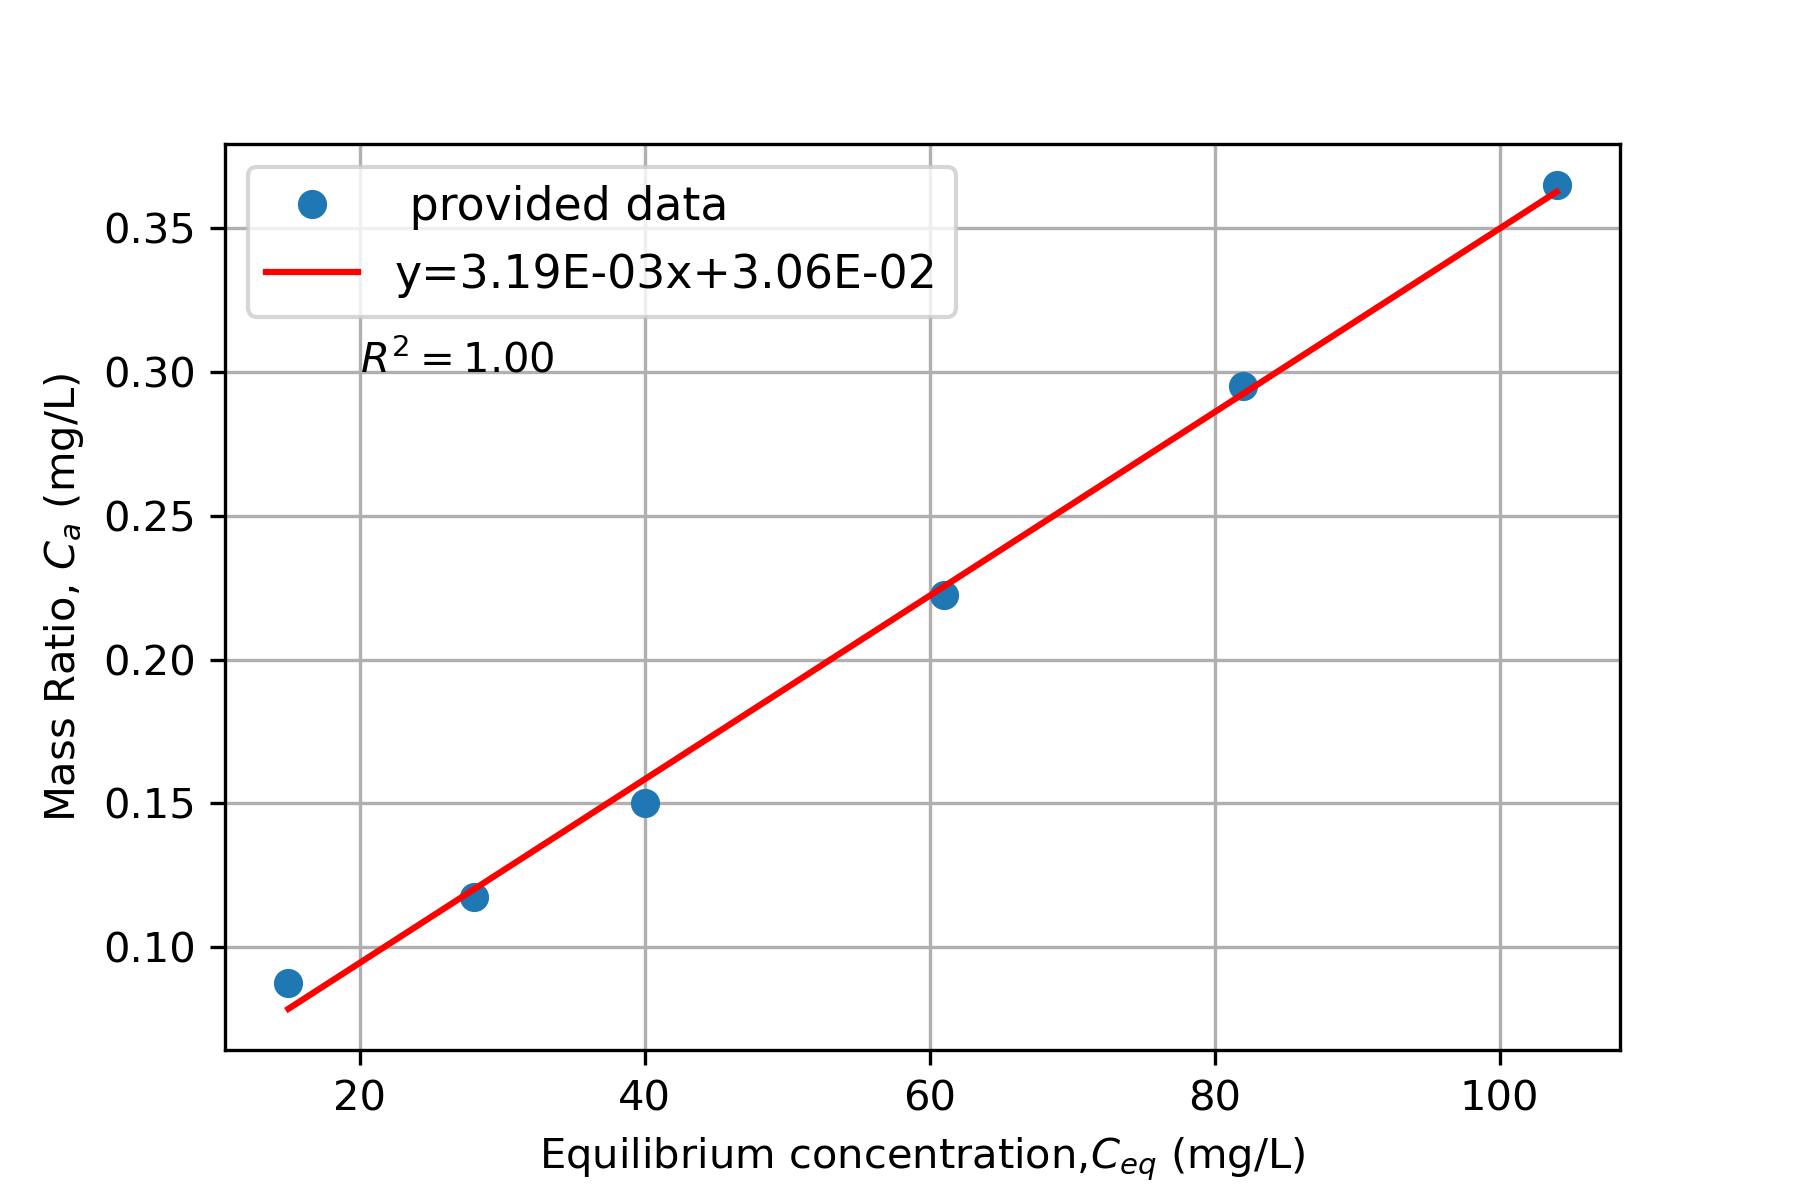

In [18]:
# Solution problem 23b

r23_7 = pn.pane.Markdown("""
The linear isotherm is the regression line through the origin of the _C<sub>a</sub>_ vs._C<sub>eq</sub>_ plot.
Its slope is the distribution coefficient _K<sub>d</sub>_<br><br>
***Here:***<br><br>
K<sub>d</sub> = 3.19E-03 L/ g<br><br>
K<sub>d</sub> = 3.19 cm<sup>3</sup>/ g
""",width = 400, style={'font-size': '13pt'})

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(d23_Ceq, d23_Ca) # linear regression

#output
fig = plt.figure()
plt.plot(d23_Ceq, d23_Ca, 'o', label=' provided data');
pred = intercept + slope*d23_Ceq # fit line
plt.plot(d23_Ceq, pred, 'r', label='y={:.2E}x+{:.2E}'.format(slope,intercept)) ;
plt.xlabel(r"Equilibrium concentration,$C_{eq} $ (mg/L)"); plt.ylabel(r"Mass Ratio, $C_{a} $ (mg/L)");
plt.grid(); plt.legend(fontsize=11);  plt.text(20, 0.30,'$R^2 = %0.2f$' % r_value)
plt.close() # otherwise we have 2 figure
r23_8 = pn.pane.Matplotlib(fig, dpi=150)

pn.Row(r23_7, r23_8) 

In [19]:
# Solution problem 23 c

r23_10 = pn.pane.LaTeX(r"""
$$ R = 1+ \frac{1-n_e}{n_e}\cdot \rho\cdot K_d $$
""",width = 400, style={'font-size': '13pt'})

#Given
rho = 2.7 # g/cm3 solid density
n_e = 0.30 # (), effective porosity
K_d = slope*1000 # cm^3/g, the slope of the plot, *1000 for unit conversion

# Calculate
R = 1 + ((1-n_e)/n_e)*rho*K_d 

#output
print("The Retardation factor of the sample is: {0:1.2f} \n".format(R))
print("The Retardation factor is obtained using:")

pn.Column(r23_10)

The Retardation factor of the sample is: 21.11 

The Retardation factor is obtained using:


Column
    [0] LaTeX(str, style={'font-size': '13pt'}, width=400)

In [20]:
### Tutorial Problem 24 ###

In [21]:
### Tutorial Problem ###

r24_1 = pn.pane.Markdown("""

The same series of batch experiments as in tutorial problem 23 are considered. However, experimental findings are now to be evaluated 
by assuming a Freundlich isotherm.

<br>
1. Plot decadic logarithm of mass ratio _C<sub>a</sub>_ vs. decadic logarithm of equilibrium concentration _C<sub>eq</sub>_ in a diagram.

<br>
2. Determine the Freundlich coefficient _K<sub>Fr</sub>_ and the Freundlich exponent _n<sub>Fr</sub>_.

""",width = 900, style={'font-size': '12pt'})

d24_Co = np.array([50, 75, 100, 150, 200, 250])
d24_Ceq =  np.array([15, 28, 40, 61, 82, 104])

d24 = {"Co [mg/L]":d24_Co, "Ceq [mg/L]":d24_Ceq}

df24 = pd.DataFrame(d24)

spacer = pn.Spacer(width=50)
pn.Column(r24_1, df24)

Column
    [0] Markdown(str, style={'font-size': '12pt'}, width=900)
    [1] DataFrame(DataFrame)

### solution Tutorial Problem 24 ###

In [22]:
# Solution TP 24
#Given

Vw = 25/1000 # L, volume of water in L
Ms = 10 # g, mass of Cr(IV)


r24_2 = pn.pane.LaTeX(r"""
First step: Calculate $C_a$ using

$$C_a = \frac{V_w \cdot (C_0 - C_{eq})}{M_s}$$

""",width = 900, style={'font-size': '12pt'})

# Obtain decadic logarithm of C_eq and C_a

d24_Ca = Vw/Ms*(d24_Co-d24_Ceq) # Ca  = Vw/Ms* (Co-Ceq)
log_Ca = np.log10(d24_Ca)
log_Ceq = np.log10(d24_Ceq)

# output in table form - we use pandas
log_d24 = {"Co [mg/L]":d24_Co, "Ceq [mg/L]":d24_Ceq, "Ca [mg/g]": d24_Ca, 
            "log_Ca": log_Ca, "log_Ceq": log_Ceq}

log_df24 = pd.DataFrame(log_d24)

pn.Column(r24_2, log_df24)

Column
    [0] LaTeX(str, style={'font-size': '12pt'}, width=900)
    [1] DataFrame(DataFrame)

In [23]:
#Continue solution 24

r24a = pn.pane.LaTeX(r""" 
Freundlich isotherm is a non-linear isotherm given as

$$
C_a = K_{Fr}\cdot C_{eq}^{n_{Fr}}
$$

To linearize, we can make a log transformation, i.e., we take log of both sides of equation
we ge,
$$
\log C_a = \log(K_{Fr}\cdot C_{eq}^{n_{Fr}})
$$
which becomes,
$$
\log C_a = \log K_{Fr} +  n_{Fr} \log C_{eq} 
$$

comparable to the straight line equation $y = \text{m}x + c$, with 
m = $n_{Fr}$ = slope and $c$ = $\log K_{Fr}$ = intercept

i.e., fitting data linearly provide $n_{Fr}$ and $K_{Fr}$

""",width = 600, style={'font-size': '12pt'})

r24a

LaTeX(str, style={'font-size': '12pt'}, width=600)

Column
    [0] Row
        [0] Matplotlib(Figure, dpi=150, height=300, width=450)
        [1] Matplotlib(Figure, dpi=150, height=300, width=450)
    [1] LaTeX(str, style={'font-size': '12pt'}, width=600)
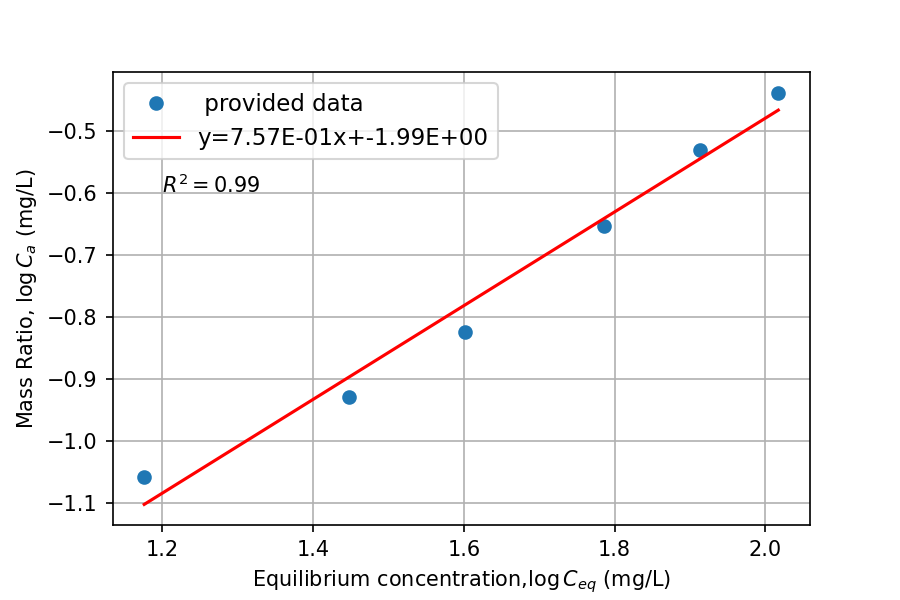
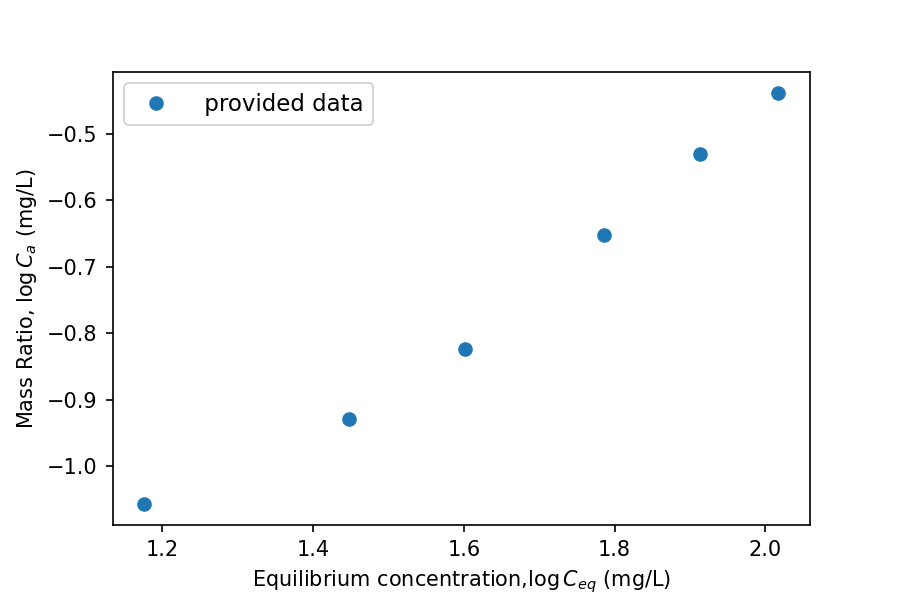

In [30]:
# Continue solution P 24

fig1 = plt.figure()

plt.plot(log_Ceq, log_Ca, 'o', label=' provided data');
plt.xlabel(r"Equilibrium concentration,$\log C_{eq} $ (mg/L)"); plt.ylabel(r"Mass Ratio, $\log C_{a} $ (mg/L)");
plt.legend(fontsize=11);
plt.close() # otherwise we have 2 figure only when using pn.
r24_3 = pn.pane.Matplotlib(fig1, dpi=150)


# Linear fit we use scipy.stats.linregress library
slope, intercept, r_value, p_value, std_err = stats.linregress(log_Ceq, log_Ca) # linear regression

# Make a fit plot
fig2 = plt.figure()
plt.plot(log_Ceq, log_Ca, 'o', label=' provided data');
pred = intercept + slope*log_Ceq # fit line y = mx + C
plt.plot(log_Ceq, pred, 'r', label='y={:.2E}x+{:.2E}'.format(slope,intercept)) ;
plt.xlabel(r"Equilibrium concentration,$\log C_{eq} $ (mg/L)"); plt.ylabel(r"Mass Ratio, $\log C_{a} $ (mg/L)");
plt.grid(); plt.legend(fontsize=11);  plt.text(1.20, -0.60,'$R^2 = %0.2f$' % r_value)
plt.close() # otherwise we have 2 figure
r24_4 = pn.pane.Matplotlib(fig2, dpi=150)

# solution 10.2

r24_5 = pn.pane.LaTeX(r""" 
The fit is almost perfect $R^2 = 0.99$. So we can use linear-fit results to get<br>
a. slope = $n_{Fr}$ = 0.76 <br>
b. intercept = $\log K_{Fr}$ = -1.99, i.e., $K_{Fr} = 10^{-1.99}$

""",width = 600, style={'font-size': '12pt'})

#output
r24_6 = pn.Row(r24_3, r24_4) 
pn.Column(r24_6, r24_5)

### Tutorial problem 25 - contaminated site ###

Column
    [0] LaTeX(str, style={'font-size': '12pt'}, width=800)
    [1] PNG(str, width=800)
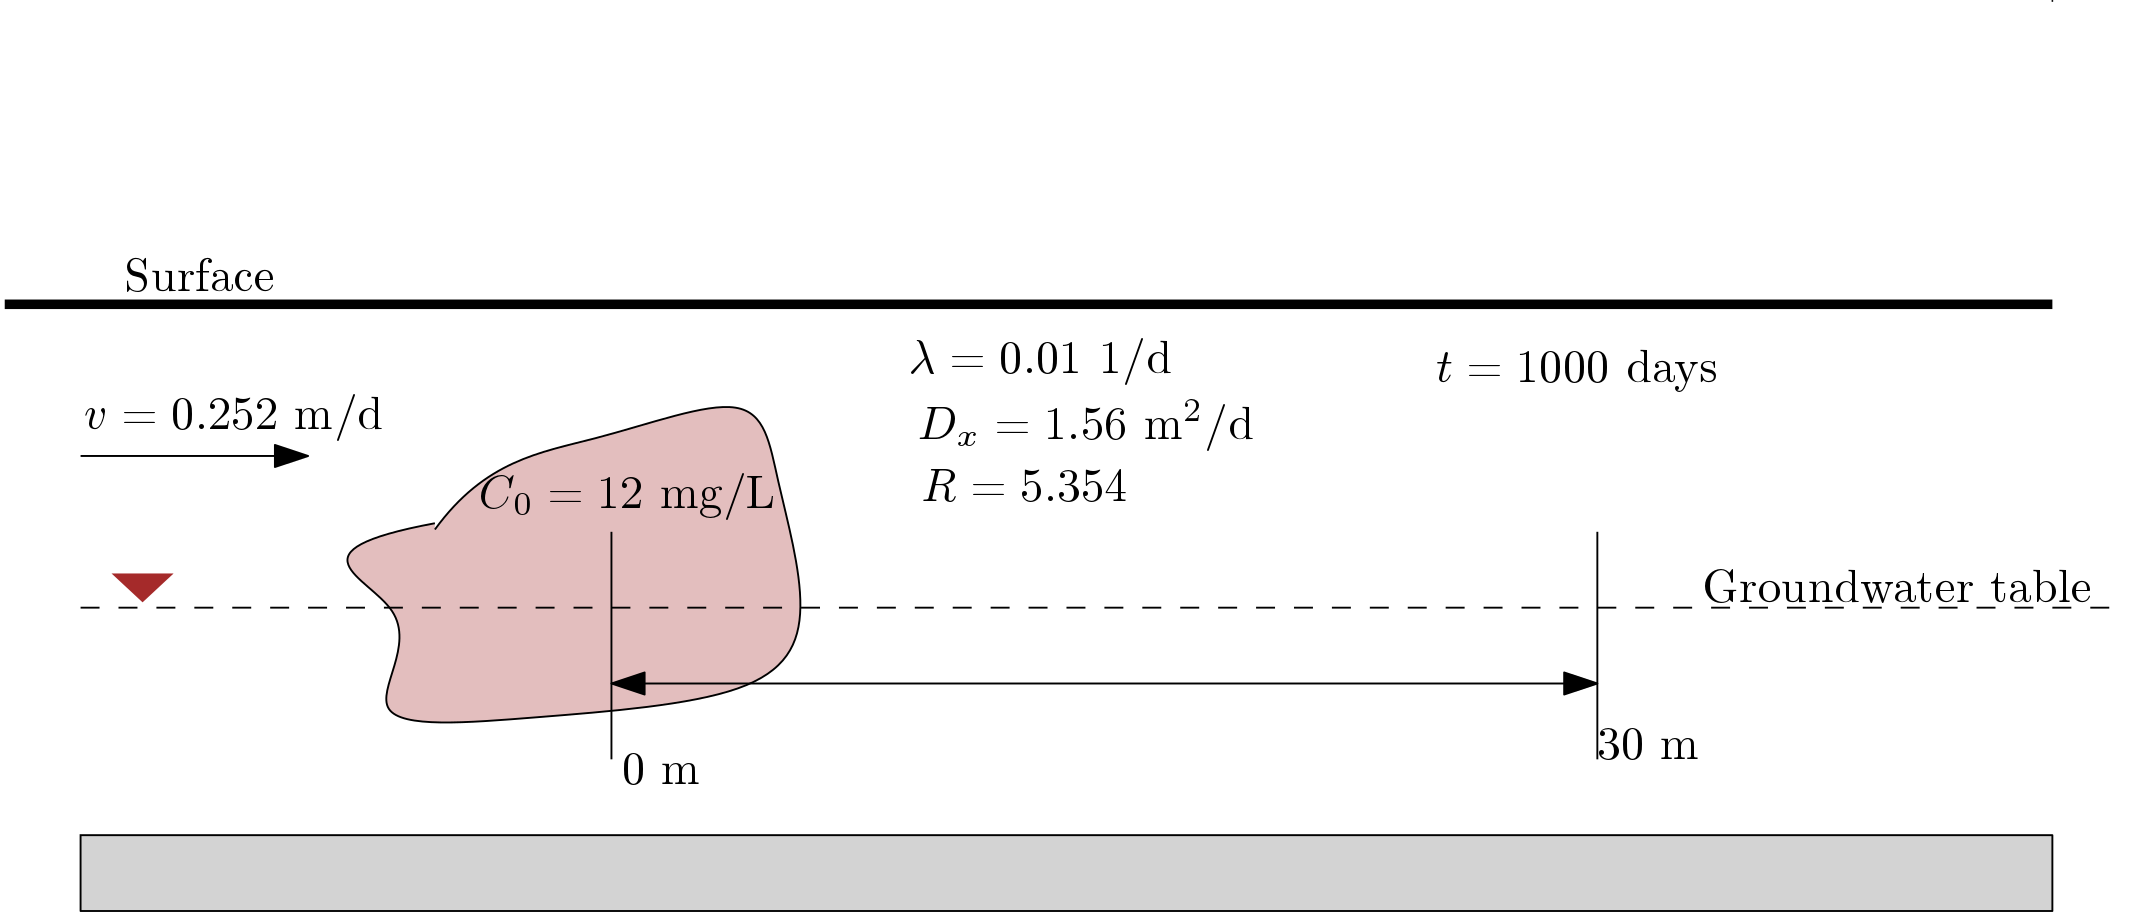

In [25]:
r25_2 = pn.pane.LaTeX(r"""
A contaminated site is to be evaluated for a potential spread of contaminat
from a source with an uniform concentration 12 mg/L (see figure below). The observation is to be 
made at 30 m from the source for over 1000 days. The available informations are
the first order decay constant of the sediment is 0.01 1/d and soil retardation 
coefficient is 5.354. The groundwater velocity in the aquifer is 0.252 m/d and
the longitudinal dispersion was computed to be 1.56 m$^2$/d.
""",width = 800, style={'font-size': '12pt'})

r25_4 = pn.pane.PNG("images/T09_TP25.png", width=800)


pn.Column(r25_2, r25_4) 

In [26]:
### solution of Problem 25 ###

In [27]:
r25_5 = pn.pane.LaTeX(r"""

The site is to be modeled using analytical solution provided in Wexler (1992). The provided solution for contaminant transport is $C(x,t)$:

$$
C(x,t) = \frac{C_o}{2}\Bigg[\exp \Bigg(\frac{x}{2(D_x/R)} \Bigg( \frac{v_x}{R}- \sqrt{\bigg(\frac{v_x}{R}\bigg)^2 + 4\lambda\frac{D_x}{R} }\Bigg)\Bigg)\cdot \text{erfc}\Bigg(\frac{x-t\sqrt{(v_x/R)^2 + 4\lambda(D_x/R)}}{2\sqrt{Dx/R t}} 
\Bigg) +
$$
$$
+ \exp \Bigg(\frac{x}{2(D_x/R)} \Bigg( \frac{v_x}{R} + \sqrt{\bigg(\frac{v_x}{R}\bigg)^2 + 4\lambda\frac{D_x}{R} }\Bigg)\Bigg)\cdot \text{erfc}\Bigg(\frac{x+t\sqrt{(v_x/R)^2 + 4\lambda(D_x/R)}}{2\sqrt{Dx/R t}} 
\Bigg)
\Bigg]
$$


""",width = 800, style={'font-size': '12pt'})

r25_6 = pn.pane.Markdown(r"""
We implement this solution to obtain the concentration at 30 m from the source for over 3 years time. 
<br><br>

Wexler, E. 1992. _“Analytical Solutions for One-, Two-, and Three-Dimensional Solute Transport in Groundwater 
Systems with Uniform Flow.”_ In Techniques of Water-Resources Investigations of the United States Geological Survey, 190. 
Book 3, Chapter B7.

""",width = 800, style={'font-size': '12pt'})

pn.Column(r25_5, r25_6)



Column
    [0] LaTeX(str, style={'font-size': '12pt'}, width=800)
    [1] Markdown(str, style={'font-size': '12pt'}, width=800)

### Solution of problem 25 ###

In [28]:
# Solution problem 25 

#input
Dx = 7.56 #m^2/d disp coeff
vx = 0.252 # m/d gw velocity
R = 5.354 # [] retardation
Co = 12 # mg/L in concentration
x = 30 # m distance
ld = 0.01 # 1/d lambda
t = np.linspace(0, 1000, 1000)

# interim calculations

f1 = Dx/R
f2 = vx/R
f3 = np.sqrt(f2**2+ 4*ld*f1)

import scipy.special as sc # Required for getting erfc function

T1 = np.exp(x/(2*f1)*(f2-f3))        # first exp term
T2 = sc.erfc((x-t*f3)/(2*np.sqrt(t)*f1))     # first erfc term  
T3 = np.exp(x/(2*f1)*(f2+f3))       # second exp term
T4 = sc.erfc((x+t*f3)/(2*np.sqrt(t)*f1))      # second erfc term

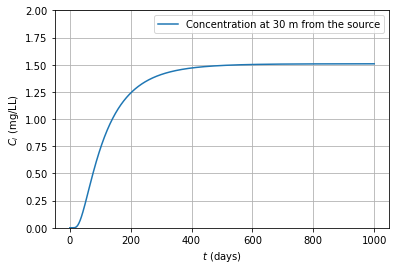

In [29]:
# solution P 27 contd.

# Calculation
C = Co/2*(T1*T2)+(T3*T4)

#plotting

plt.plot(t,C, label = "Concentration at 30 m from the source")
plt.grid() 
plt.ylim((0,2))
plt.xlabel(r"$t$ (days)"); plt.ylabel(r"$C_i$ (mg/LL)")
plt.legend() 

**Tutorial problems end here.**


Next Tutorial we perform numerical modeling using MODFLOW/MT3DMS in **modelmuse** interface

In tutorials we solved:

+ 25 Class problems
+ 11 Homework problems
+ 1-set past exam (self-learning)

We learned a bit on using Python code to solve our problem
